In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn. naive_bayes import BernoulliNB
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
import nltk
from wordcloud import WordCloud

In [ ]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),       # 1 points vertical offset
                    textcoords="offset points",
                    size=8,              
                    ha='center',va='bottom')

## Get the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/Shareddrives/IRTM/data'

In [ ]:
characters = pd.read_csv('/content/drive/Shareddrives/IRTM/data/simpsons_characters.csv')
characters.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [ ]:
locations = pd.read_csv('/content/drive/Shareddrives/IRTM/data/simpsons_locations.csv')
locations.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [ ]:
script_lines = pd.read_csv('/content/drive/Shareddrives/IRTM/data/simpsons_script_lines.csv')
script_lines.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [ ]:
script_lines

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158266,9544,32,204,Miss Hoover: (OFF LISA'S REACTION) I'm back.,831000,true,464,3.0,Miss Hoover,Springfield Elementary School,I'm back.,im back,2
158267,9545,32,205,"Miss Hoover: You see, class, my Lyme disease t...",839000,true,464,3.0,Miss Hoover,Springfield Elementary School,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,10
158268,9546,32,206,Miss Hoover: Psy-cho-so-ma-tic.,842000,true,464,3.0,Miss Hoover,Springfield Elementary School,Psy-cho-so-ma-tic.,psy-cho-so-ma-tic,1
158269,9547,32,207,Ralph Wiggum: Does that mean you were crazy?,844000,true,119,3.0,Ralph Wiggum,Springfield Elementary School,Does that mean you were crazy?,does that mean you were crazy,6




```
# 此內容會顯示為程式碼
```

## Text Preprocessing


In [ ]:
data = script_lines[['spoken_words', 'character_id', 'location_id']]
data = data.dropna()
data = data.reset_index(drop=True)

In [ ]:
data['character_id'] = [ int(x) for x in data['character_id']]

In [ ]:
data.describe(include='all')

,spoken_words,character_id,location_id
count,131733,131733.000000,131733.000000
unique,121651,NaN,NaN
top,No.,NaN,NaN
freq,305,NaN,NaN
mean,NaN,661.678258,829.573068
std,NaN,1500.025845,1197.127379
min,NaN,1.000000,1.000000
25%,NaN,2.000000,5.000000
50%,NaN,9.000000,190.000000
75%,NaN,237.000000,1308.000000


In [ ]:
from math import log
character_count = data['character_id'].value_counts()
label = list(character_count.index)
label = [str(c) for c in label]
value = list(character_count)
value_100 = [x/100 for x in value]

<function matplotlib.pyplot.show>

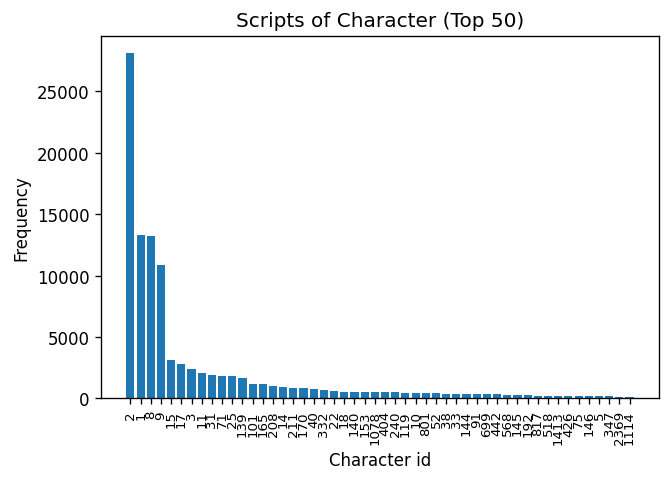

In [ ]:
plt.rcParams["figure.dpi"] = 120

plt.bar(label[:50], value[:50])
plt.title('Scripts of Character (Top 50)')
plt.ylabel('Frequency')
plt.xlabel('Character id')
plt.xticks(label[:50],rotation='vertical', size = 8)
plt.show

<function matplotlib.pyplot.show>

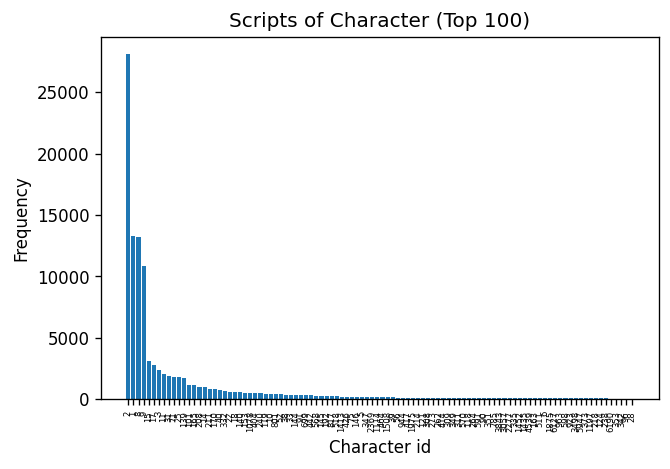

In [ ]:
plt.rcParams["figure.dpi"] = 120

plt.bar(label[:100], value[:100])
plt.title('Scripts of Character (Top 100)')
plt.ylabel('Frequency')
plt.xlabel('Character id')
plt.xticks(label[:100],rotation='vertical', size = 5)
plt.show

In [ ]:
target_char_id= [2, 1, 8, 9, 15, 17, 3, 11, 31, 71, 25, 139, 101, 165]

In [ ]:
target_data = data[data['character_id'].isin(target_char_id)]

In [ ]:
target_data.reset_index(drop=True)

,spoken_words,character_id,location_id
0,Where's Mr. Bergstrom?,9,3.0
1,That life is worth living.,9,3.0
2,Victory party under the slide!,8,3.0
3,Mr. Bergstrom! Mr. Bergstrom!,9,374.0
4,Do you know where I could find him?,9,374.0
...,...,...,...
85253,No.,1,373.0
85254,Does Bart have to be there?,9,373.0
85255,Yes.,1,373.0
85256,Can we do it this week?,9,373.0


In [ ]:
character_count = target_data['character_id'].value_counts()

In [ ]:
label = list(character_count.index)
label = [str(c) for c in label]
value = list(character_count)

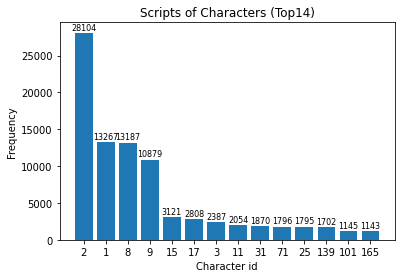

In [ ]:
fig, ax = plt.subplots()
rects = ax.bar(label, value, width=0.8, bottom=None, align='center')
plt.title('Scripts of Characters (Top14)') 
plt.ylabel('Frequency') 
plt.xlabel('Character id')
plt.xticks(label)   

autolabel(rects)
plt.show()

In [ ]:
for i  in target_char_id[0]:
  target_data[target_data['character_id'] == 9]

,spoken_words,character_id,location_id
1,Where's Mr. Bergstrom?,9,3.0
3,That life is worth living.,9,3.0
8,Mr. Bergstrom! Mr. Bergstrom!,9,374.0
10,Do you know where I could find him?,9,374.0
12,"The train, how like him... traditional, yet en...",9,374.0
...,...,...,...
131719,Can we have wine?,9,373.0
131721,Can I have wine?,9,373.0
131723,Does Bart have to be there?,9,373.0
131725,Can we do it this week?,9,373.0


In [ ]:
random.uniform(0, 1) > 0.8

False

## Turn Documents into TF-IDF Vectors


In [ ]:
binary_vectorizer = CountVectorizer(binary=True)
binary_vectors = binary_vectorizer.fit_transform(target_data['spoken_words'])

In [ ]:
binary_vectors[[3,5,7,10]]

<4x29155 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

## Seperate Data into Training and Testing Data

In [ ]:
data['character_id'].value_counts()[:10]

2.0     23015
1.0     10752
8.0     10591
9.0      9080
2        5089
8        2596
1        2515
15.0     2499
17.0     2343
3.0      2044
Name: character_id, dtype: int64

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)